# Filter Commercial Data (Local)

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
import glob
import re
import warnings

# Reload changed modules every time
%load_ext autoreload
%autoreload 2

## Load in CSV

In [5]:
path = '/MultiModalTVShowSeg-2022/mtvss/data/tmp/Commercial_Identification.csv'
df = pd.read_csv(path)
df.head()

,Counter,Row,ColumnCounter,Video,Filename,"What is the start time of the commercial? (Remember to pause the video at the black frame right before the commercial starts, and then click on Share and click the ""start at"" button before copying and pasting the URL here)","What is the END time of the commercial? (Remember to pause the video at the black frame right after the commercial ends, and then click on Share and click the ""start at"" button before copying and pasting the URL here)",Who is the ad's sponsor (or the company who makes the product in the ad)?,"What is the product being advertised, if any?",Is the Commercial Particularly Interesting/Weird/Cool?,Blank,Date,Sponsor--Product,StartTime,EndTime,Time,Interesting,Formula
0,1,1,1,https://youtu.be/Hh0PsOJW2j4,1989 08 04 0000 US NA024556 V3 VHS24 MB2 H24 JM,https://youtu.be/Hh0PsOJW2j4?t=424,https://youtu.be/Hh0PsOJW2j4?t=424,Toyota,Auto Mobile dealership,No,0.0,1989 08 04,Toyota --Auto Mobile dealership,424,424,0,NaN,"ffmpeg -ss 423 -i ""1989 08 04 0000 US NA024556..."
1,2,1,7,https://youtu.be/Hh0PsOJW2j4,1989 08 04 0000 US NA024556 V3 VHS24 MB2 H24 JM,https://youtu.be/Hh0PsOJW2j4?t=455,https://youtu.be/Hh0PsOJW2j4?t=484,Whirlpool,Washing Machine,No,0.0,1989 08 04,Whirlpool--Washing Machine,455,484,29,NaN,"ffmpeg -ss 454 -i ""1989 08 04 0000 US NA024556..."
2,3,1,13,https://youtu.be/Hh0PsOJW2j4,1989 08 04 0000 US NA024556 V3 VHS24 MB2 H24 JM,https://youtu.be/Hh0PsOJW2j4?t=485,https://youtu.be/Hh0PsOJW2j4?t=514,EL Pollo Loco,chicken,Yes,0.0,1989 08 04,EL Pollo Loco--chicken,485,514,29,Int,"ffmpeg -ss 484 -i ""1989 08 04 0000 US NA024556..."
3,4,1,19,https://youtu.be/Hh0PsOJW2j4,1989 08 04 0000 US NA024556 V3 VHS24 MB2 H24 JM,https://youtu.be/Hh0PsOJW2j4?t=807,https://youtu.be/Hh0PsOJW2j4?t=839,Toyota,car,Yes,0.0,1989 08 04,Toyota--car,807,839,32,Int,"ffmpeg -ss 806 -i ""1989 08 04 0000 US NA024556..."
4,5,1,25,https://youtu.be/Hh0PsOJW2j4,1989 08 04 0000 US NA024556 V3 VHS24 MB2 H24 JM,https://youtu.be/Hh0PsOJW2j4?t=839,https://youtu.be/Hh0PsOJW2j4?t=868,Segrams,Wine Cooler,Yes,0.0,1989 08 04,Segrams--Wine Cooler,839,868,29,Int,"ffmpeg -ss 838 -i ""1989 08 04 0000 US NA024556..."


### Filter Dataframe 

In [14]:
# First filter out unwanted columns
filter_list = ['Counter','Row','ColumnCounter','Filename',
               'StartTime','EndTime','Time','Formula']
df = df[filter_list]
df.head()

,Counter,Row,ColumnCounter,Filename,StartTime,EndTime,Time,Formula
0,1,1,1,1989 08 04 0000 US NA024556 V3 VHS24 MB2 H24 JM,424,424,0,"ffmpeg -ss 423 -i ""1989 08 04 0000 US NA024556..."
1,2,1,7,1989 08 04 0000 US NA024556 V3 VHS24 MB2 H24 JM,455,484,29,"ffmpeg -ss 454 -i ""1989 08 04 0000 US NA024556..."
2,3,1,13,1989 08 04 0000 US NA024556 V3 VHS24 MB2 H24 JM,485,514,29,"ffmpeg -ss 484 -i ""1989 08 04 0000 US NA024556..."
3,4,1,19,1989 08 04 0000 US NA024556 V3 VHS24 MB2 H24 JM,807,839,32,"ffmpeg -ss 806 -i ""1989 08 04 0000 US NA024556..."
4,5,1,25,1989 08 04 0000 US NA024556 V3 VHS24 MB2 H24 JM,839,868,29,"ffmpeg -ss 838 -i ""1989 08 04 0000 US NA024556..."


#### NaN Values

In [15]:
# Get number of NaNs in the df prior to filtering
df[['Formula']].isna().sum()

Formula    2274
dtype: int64

In [19]:
df = df.dropna()

In [20]:
# Get number of NaNs in the df after filtering
df[['Formula']].isna().sum()

Formula    0
dtype: int64

## Visualizations 

Text(0, 0.5, 'Frequency')

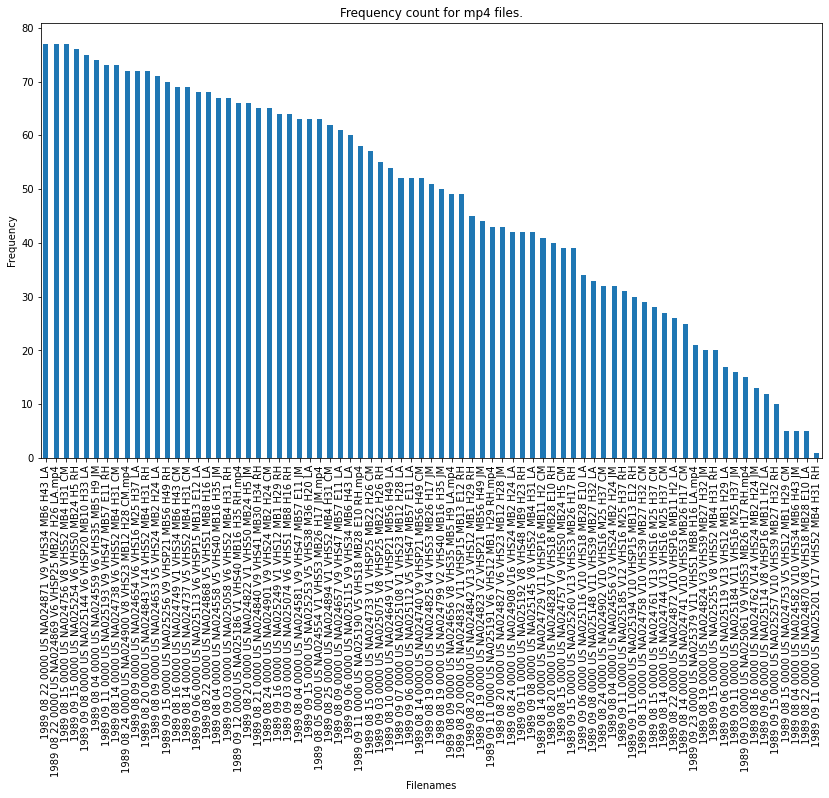

In [59]:
# Barplot
ax = df['Filename'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Frequency count for mp4 files.",
                                    use_index=True)
ax.set_xlabel("Filenames")
ax.set_ylabel("Frequency")

In [44]:
def new_index_name(file):
    file = file.split(' ')
    file = file[0:3]
    return ' '.join(file)

In [57]:
ax = df['Filename'].value_counts()
index_name = map(new_index_name, ax.index)
index_name = list(index_name)
index_name

['1989 08 22',
 '1989 08 22',
 '1989 08 15',
 '1989 09 15',
 '1989 09 08',
 '1989 08 04',
 '1989 09 11',
 '1989 08 14',
 '1989 08 24',
 '1989 08 09',
 '1989 08 20',
 '1989 08 09',
 '1989 09 15',
 '1989 08 16',
 '1989 08 14',
 '1989 09 06',
 '1989 08 22',
 '1989 08 04',
 '1989 09 03',
 '1989 09 12',
 '1989 08 20',
 '1989 08 21',
 '1989 08 24',
 '1989 09 16',
 '1989 09 03',
 '1989 08 04',
 '1989 09 15',
 '1989 08 05',
 '1989 08 25',
 '1989 08 09',
 '1989 09 06',
 '1989 09 11',
 '1989 08 15',
 '1989 09 03',
 '1989 08 10',
 '1989 09 07',
 '1989 09 06',
 '1989 08 14',
 '1989 08 19',
 '1989 08 19',
 '1989 08 09',
 '1989 08 20',
 '1989 08 20',
 '1989 08 19',
 '1989 09 11',
 '1989 08 20',
 '1989 08 24',
 '1989 09 11',
 '1989 09 08',
 '1989 08 14',
 '1989 08 20',
 '1989 08 15',
 '1989 09 15',
 '1989 09 06',
 '1989 09 08',
 '1989 08 24',
 '1989 08 04',
 '1989 09 11',
 '1989 09 11',
 '1989 08 15',
 '1989 08 15',
 '1989 08 14',
 '1989 08 22',
 '1989 08 14',
 '1989 09 23',
 '1989 08 19',
 '1989 09 